## Reading a file

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib

In [2]:
csv_path = Path('user_info/artwork_data.csv')
df = pd.read_csv(csv_path)
# df = pd.read_csv(csv_path, index_col='id', usecols=['id', 'artist'])
# column selection:
#df.info()
#df.describe()
df['artist']
artists = df['artist']
unique_artists = pd.unique(artists)
len(unique_artists)
len(artists)
#print(f"Number of total artists: {len(artists)} and unique ones: {len(unique_artists)}")
df.loc[:, 'id'].sort_values()
df.iloc[1:100, :].sort_values(by='id', ascending=False)
id_col = df.loc[:, 'id'] # this is series now, 1d array
year = df['year'] # year.info() # year.describe()
new_year = pd.to_numeric(year, errors='coerce')
year.value_counts()
new_year.max()
new_year.min()
df.iloc[new_year.idxmax(), :]
# Filtering
specific_year = new_year.value_counts()
specific_year[2003] # 96
counter = 0
for i in new_year:
    if i == 2003:
        counter = counter+1
counter # 96
smaller_df = df.loc[1:100, :].copy()
grouped_by_artist = df.groupby('artist')
for name, group in grouped_by_artist:
    title_quantity = len(group['title'])
    max_year = group['acquisitionYear'].max()
    # print(f"{name}: {max_year}")
    # print(title_quantity)
# df.to_excel('user_info/df.xlsx')

C:\Users\khali\AppData\Local\Temp\ipykernel_14704\2089552914.py:2: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


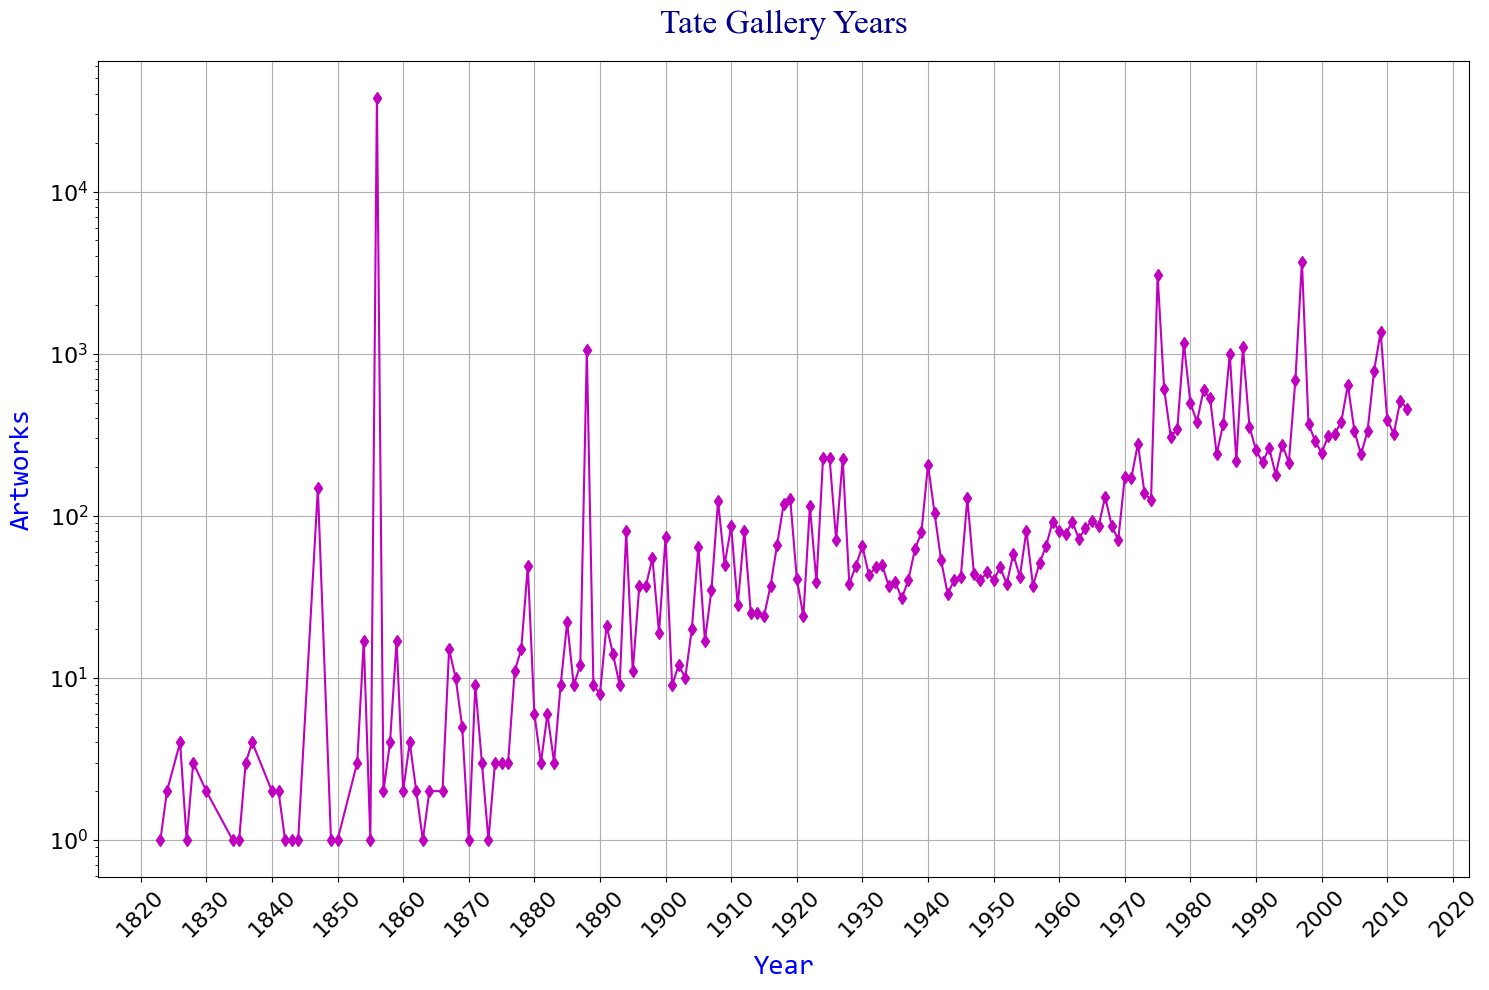

In [65]:
by_year = df.groupby('acquisitionYear').size()

rcParams.update({'figure.autolayout':True, 'axes.titlepad':20})
plt.rcParams['figure.figsize'] = (15, 10)
title_font = {
    'family':'times new roman', 
    'color': 'darkblue',
    'weight': 'normal',
    'size': 24,
}
labels_font = {
    'family': 'consolas',
    'color': 'darkred',
    'weight': 'normal',
    'size': 20,
}

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
by_year.plot(ax=subplot, rot=45, logy=True, grid=True, marker='d', color='m')
subplot.set_xlabel('Year', fontdict=labels_font, labelpad=10, color='b')
subplot.set_ylabel('Artworks', fontdict=labels_font, labelpad=10, color='b')
subplot.set_title('Tate Gallery Years', fontdict=title_font)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
subplot.locator_params(nbins=30, axis='x')
# fig.savefig('user_info/gallery_plot.png')
# fig.savefig('user_info/gallery_plot.svg')